# Исследование взаимосвязей

## Описание файла AppleStore.csv:

    - "n": номер приложения
    - "id" : идентификатор приложения
    - "track_name": название приложения
    - "size_bytes": размер в байтах
    - "currency": тип валюты, в которой измеряется цена
    - "price": цена
    - "rating_count_tot": суммарное число оценок пользователей (для всех версий)
    - "rating_count_ver": суммарное число оценок пользователей (для текущей версии)
    - "user_rating" : средняя оценка пользователей (для всех версий)
    - "user_rating_ver": средняя оценка пользователей (для текущей версии)
    - "ver": код последней версии
    - "cont_rating": возрастное ограничение контента
    - "prime_genre": основной жанр
    - "sup_devices.num": количество поддерживающих устройств
    - "ipadSc_urls.num": количество скриншотов в описании
    - "lang.num": число поддерживаемых языков
    - "vpp_lic": лицензирование на основе устройства Vpp


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Latex
from sympy import latex
from scipy import stats

# Загрузка данных
data = pd.read_csv('csv_files/AppleStore.csv')

### Проверка отличия распределения от «нормального»

Проведем тест для проверки отличия распределения метрических переменных от нормального.

In [16]:
# Перечень метрических переменных
numeric_variables = ["size_bytes", "price", "rating_count_tot", "rating_count_ver",
                     "user_rating", "user_rating_ver", "sup_devices.num",
                     "ipadSc_urls.num", "lang.num"]

# Проведение теста Колмогорова-Смирнова для проверки нормальности
vars_normal_dict = dict()
for x in numeric_variables:
    stat, p_value = stats.kstest(data[x], 'norm', args=(data[x].mean(), data[x].std()))
    vars_normal_dict[x] = {"stat": stat, "p_value": p_value}

pd.DataFrame.from_dict(vars_normal_dict)



,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num
stat,0.290224,0.383638,0.432416,0.45326,0.286645,0.272225,0.401,0.368156,0.290653
p_value,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.000000


Построим гистограммы распределения с наложенной кривой нормального распределения.

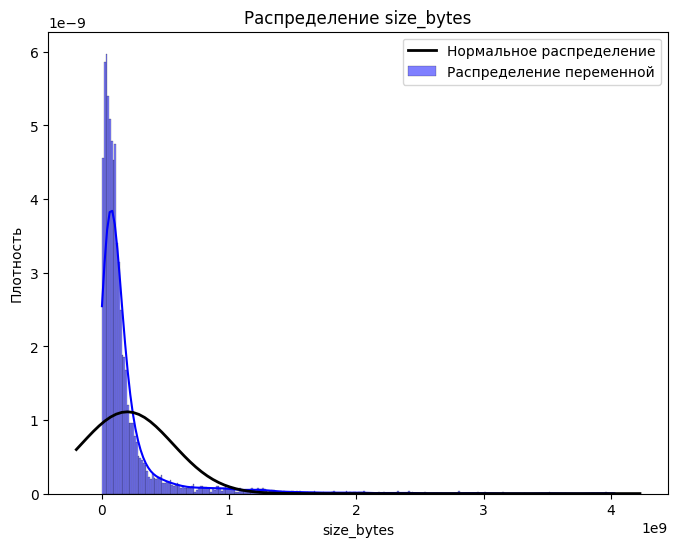

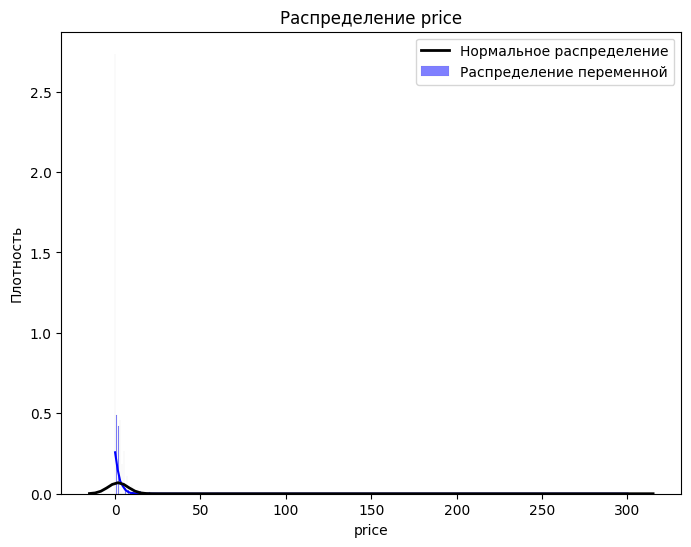

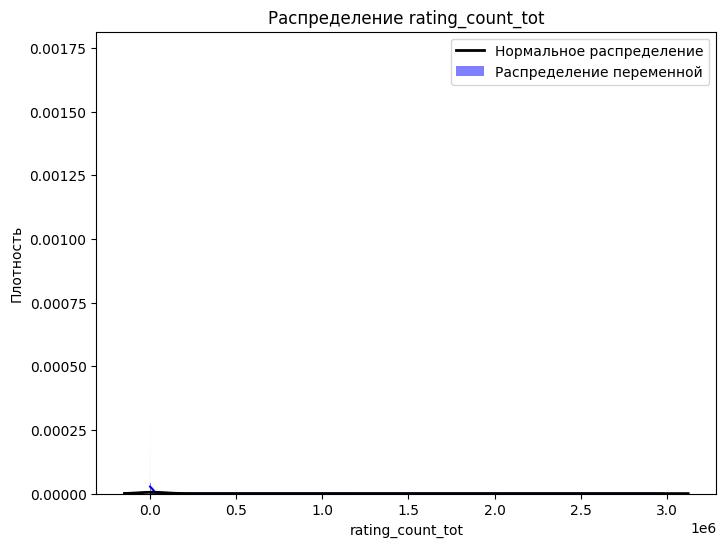

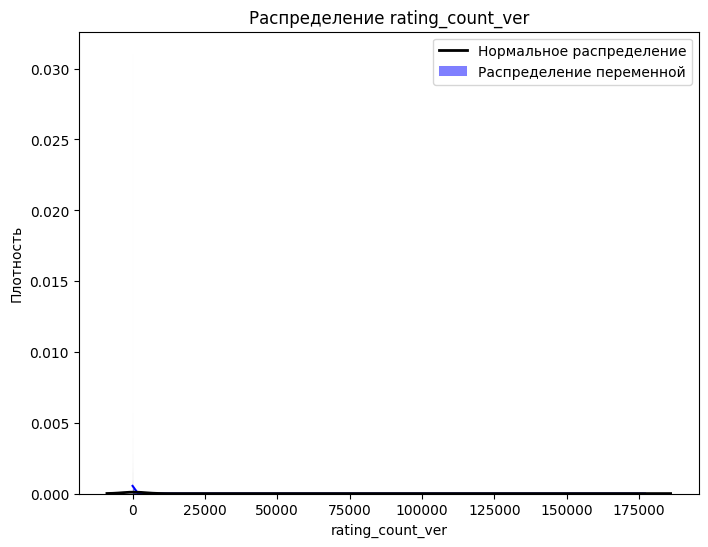

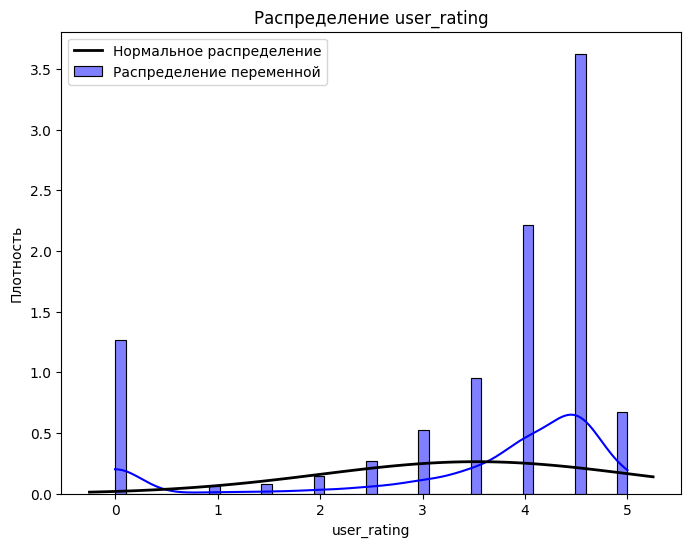

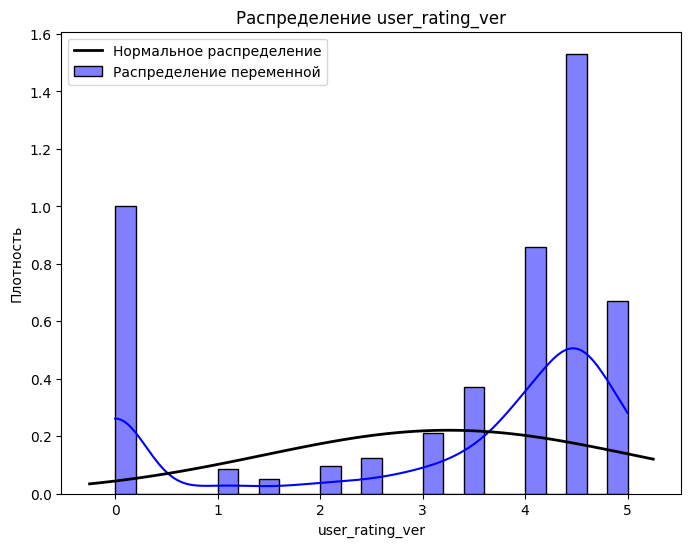

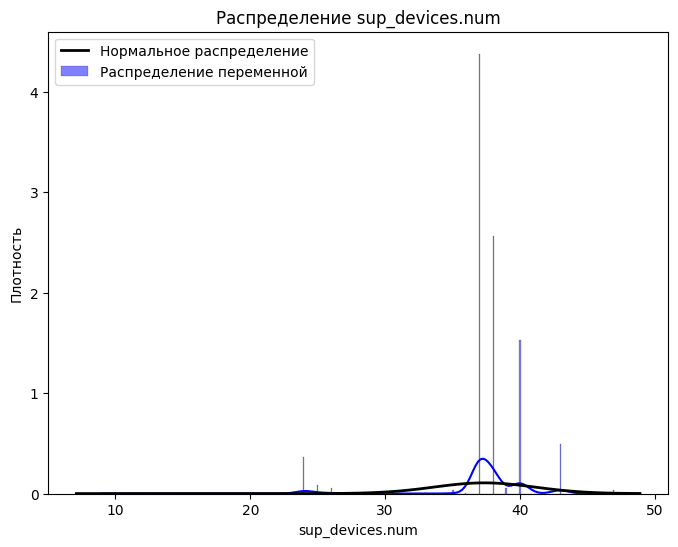

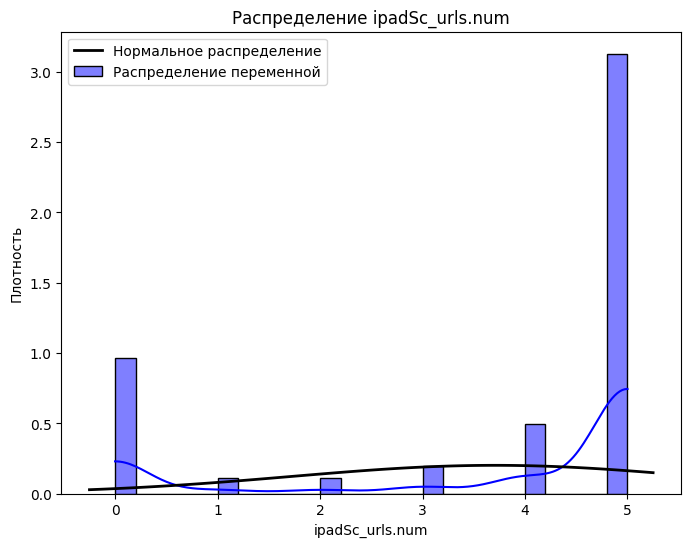

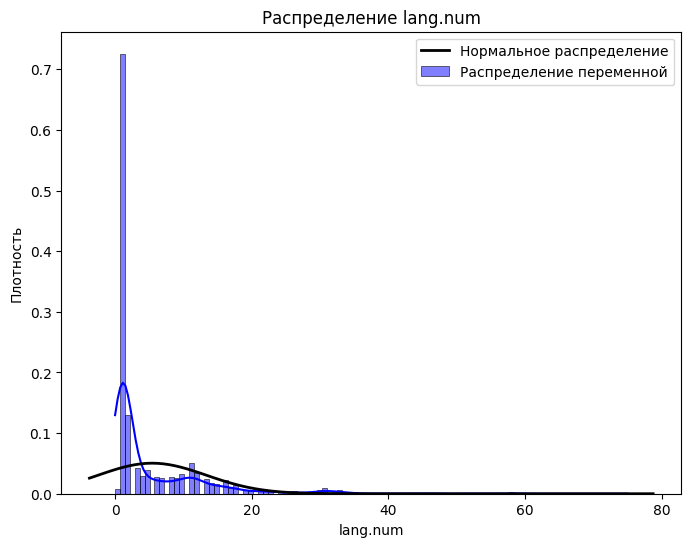

In [17]:
# Построение гистограмм распределения переменных
for var in numeric_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[var], kde=True, color='blue', label='Распределение переменной', stat='density')
    plt.xlabel(var)
    plt.ylabel('Плотность')
    plt.title(f'Распределение {var}')

    # Наложение кривой нормального распределения
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, data[var].mean(), data[var].std())
    plt.plot(x, p, 'k', linewidth=2, label='Нормальное распределение')
    plt.legend()
    plt.show()


### Сформулируем гипотезы и выводы по результатам анализа: 
Исходя из показателей теста Колмогорова-Смирнова, у всех переменных p_value = 0. Значит, принимаем гипотезу, что распределение сильно отличается от нормального. Однако это может быть обусловлено размерами выборки. Но если мы взглянем на графики и значения, которые нам выводит value_counts, мы можем заметить, что в действительности, в зависимости от переменной, наблюдается положительная или отрицательная асимметрия во всех переменных.

### Тест Хи-квадрат

Переменные для исследования

In [18]:
pairs = [("cont_rating", "user_rating_ver"),
         ("cont_rating", "user_rating"),
         ("ipadSc_urls.num", "cont_rating")]

In [19]:
from scipy.stats import chi2_contingency


for pair in pairs:
    # Создание таблицы сопряженности
    contingency_table = pd.crosstab(data[pair[0]], data[pair[1]])

    # Выполнение теста Хи-квадрат
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Вывод результатов
    display(f"Тест Хи-квадрат для переменных {pair}:")
    display(f"Chi2: {chi2_stat}")
    display(f"P-value: {p_val}")

    # Построение таблицы сопряженности
    display("Таблица сопряженности:")
    display(contingency_table)
    print("------------------------------------------------------")


"Тест Хи-квадрат для переменных ('cont_rating', 'user_rating_ver'):"

'Chi2: 356.97367894691354'

'P-value: 2.6756685287721707e-59'

'Таблица сопряженности:'

user_rating_ver,0.0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
cont_rating,,,,,,,,,,
12+,233,9,13,25,31,38,94,204,363,145
17+,273,19,8,18,14,25,26,73,101,65
4+,807,91,52,88,114,205,332,746,1373,625
9+,130,6,1,5,17,36,81,214,368,129


------------------------------------------------------


"Тест Хи-квадрат для переменных ('cont_rating', 'user_rating'):"

'Chi2: 243.53913379927792'

'P-value: 9.973414567345148e-37'

'Таблица сопряженности:'

user_rating,0.0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
cont_rating,,,,,,,,,,
12+,151,3,9,18,25,57,102,247,453,90
17+,181,5,6,12,24,33,64,117,144,36
4+,496,34,40,72,132,253,457,1021,1648,280
9+,101,2,1,4,15,40,79,241,418,86


------------------------------------------------------


"Тест Хи-квадрат для переменных ('ipadSc_urls.num', 'cont_rating'):"

'Chi2: 346.1880885622696'

'P-value: 1.3165425998987841e-64'

'Таблица сопряженности:'

cont_rating,12+,17+,4+,9+
ipadSc_urls.num,,,,
0,209,270,803,105
1,29,15,94,17
2,17,10,115,14
3,40,19,191,36
4,117,80,436,77
5,743,228,2794,738


------------------------------------------------------


Исходя из таблиц сопряженности, можно использовать тест Хи-квадрат для выбранного набора пар переменных, потому что 95% ячеек содержат ожидаемую частоту больше 5. Во всех трех случаях значение p_value очень мало (гораздо меньше 0.05), значит, что наблюдается сильная статистическая связь между данными парами(гипотезы Н1 принимаются на уровне 1%). Значит, есть связь между рейтингом приложения (текущей версии или в общем) и возрастным ограничением, а также между возрастным ограничением и количеством скриншотов в описании. Однако, определить связь или ее направление, используя только тест Хи-квадрат нельзя, поэтому никаких выводов сделать тоже не предоставляется возможным.

### Парная корреляция

Пары переменных, гипотезы и характеристики взаимосвязи

In [20]:
d = {
     'Анализируемые пары переменных': ['size_bytes, price', 'cont_rating, user_rating', 'ipadSc_urls.num, rating_count_tot'],
     'Выбранный коэффициент корреляции (обоснование выбора)': ['Пирсона (обе переменные метрические)', 'Спирмен (порядковая и интервальная переменные)', 'Пирсона (обе переменные метрические)'],
     'Гипотеза': ['Существует взаимосвязь между размером приложения в байтах и его стоимостью',
                  'Существует взаимосвязь между возрастным ограничением приложения и его рейтингом',
                  'Существует взаимосвязь между количеством оценок приложения и его рейтингом'],
     'Сила взаимосвязи': ['очень слабая', 'очень слабая', 'очень слабая'],
     'Направление взаимосвязи': ['прямая(коэфф >0)', 'прямая(коэфф >0)', 'прямая(коэфф >0)'],
     'Статистическая значимость взаимосвязи': ['p-val < 0.05, гипотеза H1 подтвердилась', 'p-val < 0.05, гипотеза H1 подтвердилась', 'p-val > 0.1, гипотеза H1 отвергается на уровне 10%'],
}


df = pd.DataFrame(data=d)
display(df.T)

,0,1,2
Анализируемые пары переменных,"size_bytes, price","cont_rating, user_rating","ipadSc_urls.num, rating_count_tot"
Выбранный коэффициент корреляции (обоснование выбора),Пирсона (обе переменные метрические),Спирмен (порядковая и интервальная переменные),Пирсона (обе переменные метрические)
Гипотеза,Существует взаимосвязь между размером приложен...,Существует взаимосвязь между возрастным ограни...,Существует взаимосвязь между количеством оцено...
Сила взаимосвязи,очень слабая,очень слабая,очень слабая
Направление взаимосвязи,прямая(коэфф >0),прямая(коэфф >0),прямая(коэфф >0)
Статистическая значимость взаимосвязи,"p-val < 0.05, гипотеза H1 подтвердилась","p-val < 0.05, гипотеза H1 подтвердилась","p-val > 0.1, гипотеза H1 отвергается на уровне..."


Коэффициент Пирсона для size_bytes и price:


PearsonRResult(statistic=0.18239187109377158, pvalue=7.100531549372062e-55)

Коэффициент Спирмена для cont_rating и user_rating:


SignificanceResult(statistic=0.0708657571007115, pvalue=1.76117908954743e-09)

Коэффициент Пирсона для ipadSc_urls.num и rating_count_tot:


PearsonRResult(statistic=0.015734290510253768, pvalue=0.1819839164082032)

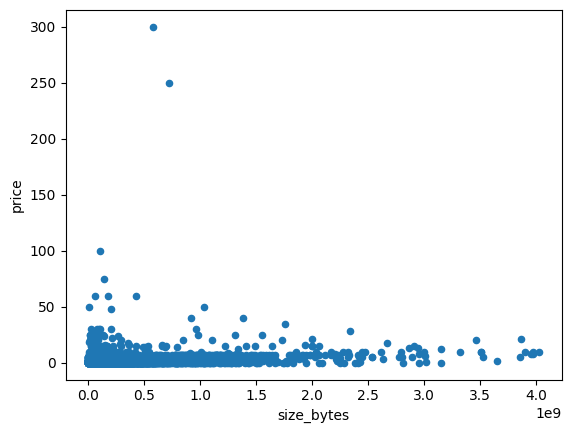

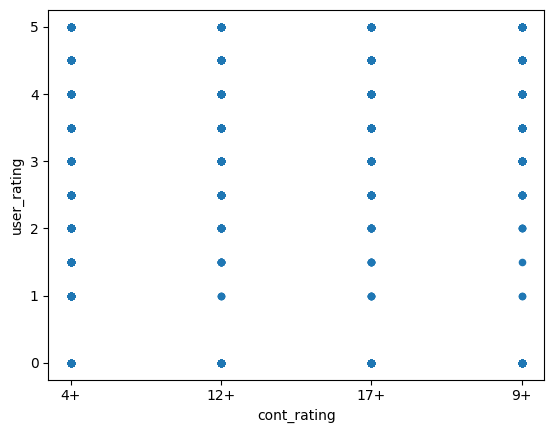

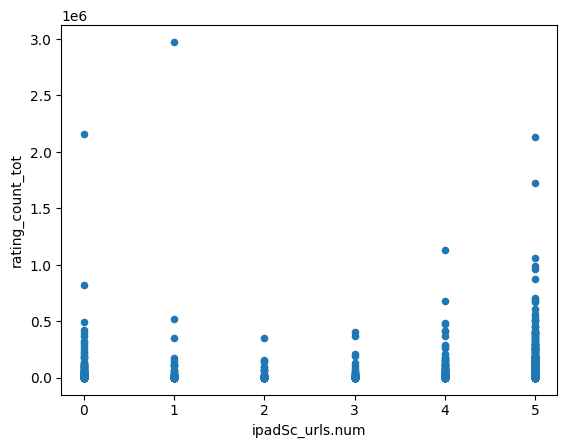

In [21]:

print('Коэффициент Пирсона для size_bytes и price:')
display(stats.pearsonr(data.size_bytes, data.price))
data.plot('size_bytes', 'price', kind = 'scatter')
print('Коэффициент Спирмена для cont_rating и user_rating:')
display(stats.spearmanr(data.cont_rating, data.user_rating))
data.plot('cont_rating', 'user_rating', kind = 'scatter')
print('Коэффициент Пирсона для ipadSc_urls.num и rating_count_tot:')
display(stats.pearsonr(data['ipadSc_urls.num'], data.rating_count_tot))
data.plot('ipadSc_urls.num', 'rating_count_tot', kind = 'scatter')
display()



## Частная корреляция

In [22]:
import pingouin as pg
from math import sqrt

display(stats.pearsonr(data.price, data.size_bytes))
r_xy = stats.pearsonr(data.price, data.size_bytes)[0]
r_xz = stats.pearsonr(data.price, data.user_rating)[0]
r_yz = stats.pearsonr(data.size_bytes, data.user_rating)[0]
r_xy_z = (r_xy - r_xz * r_yz) / sqrt((1 - r_xz ** 2) * (1 - r_yz ** 2))
print(f'Парный коэффициент корреляции между price и size_bytes: {r_xy}')
print(f'Частный коэффициент корреляции между price и size_bytes, исключив влияние переменной user_rating: {r_xy_z}')

PearsonRResult(statistic=0.18239187109377158, pvalue=7.100531549372062e-55)

Парный коэффициент корреляции между price и size_bytes: 0.18239187109377158
Частный коэффициент корреляции между price и size_bytes, исключив влияние переменной user_rating: 0.1798945858735893


#### Парная корреляция очень слабая, статистически значимая.
Частная корреляция совсем немного меньше, значит, что рейтинг несильно влиял на корреляцию. Можно сделать вывод, что корреляция между ценой и размером в байтах очень слабая, даже абстрагировавшись от влияния рейтинга. Это значит, что размер прилоения не зависит от цены.

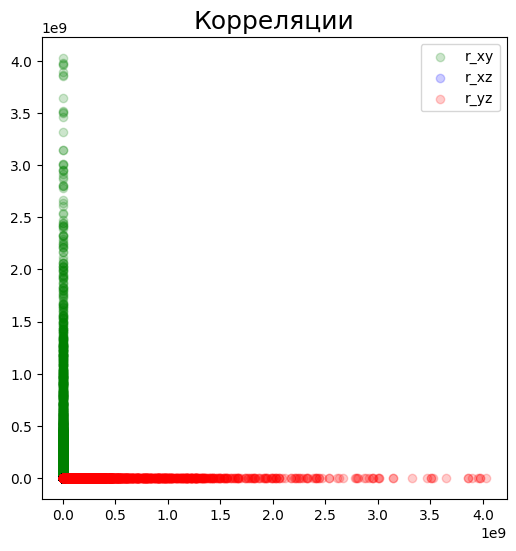

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

plt.scatter(data.price, data.size_bytes, c='g', alpha=0.2, label='r_xy')
plt.scatter(data.price, data.user_rating, c='b', alpha=0.2, label='r_xz')
plt.scatter(data.size_bytes, data.user_rating, c='r', alpha=0.2, label='r_yz')
plt.title('Корреляции', fontsize=18)
plt.legend()

plt.show()